In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

['exam.csv', 'microchip.csv']


In [2]:
missing_values = ["n/a", "na", "--"]
exam_df = pd.read_csv('../input/exam.csv', header = None, na_values = missing_values)
mc_df = pd.read_csv('../input/microchip.csv', header = None, na_values = missing_values)

 **EXAM DATASET**

In [3]:
exam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [4]:
exam_df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
x_features = [0,1]
y_features = [2]
x_exam = exam_df[x_features]
y_exam = exam_df[y_features]

In [6]:
x_exam.head()

,0,1
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [7]:
y_exam.head()

,2
0,0
1,0
2,0
3,1
4,1


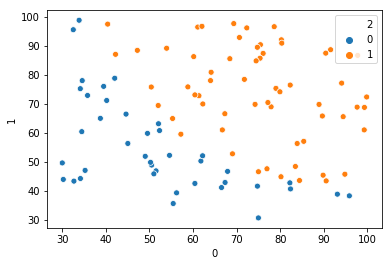

In [8]:
# sns.catplot(x="x1", y="x2", data=);
sns.scatterplot(x=0,y=1,hue=2,data=exam_df)
# plt.plot([0, 4], [1.5, 0], linewidth=2)

In [9]:
X_train, X_test, Y_train, Y_test = tts(x_exam, y_exam, test_size = 0.3, random_state = 5)

In [10]:
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_test = (X_test - np.mean(X_test))/np.std(X_test)

In [11]:
X_train = X_train.assign(b=1)
X_test = X_test.assign(b=1)

In [12]:
X_train.head()

,0,1,b
6,-0.280661,1.579510,1
88,0.660206,1.586661,1
64,-1.163003,-0.001174,1
26,0.743659,-1.138440,1
48,-0.228789,1.593045,1


In [13]:
m = len(Y_train)
n = len(X_train.columns)
weights = np.zeros((n,1))
weights

array([[0.],
       [0.],
       [0.]])

In [14]:
def sigmoid(value):
    return 1/(1+np.exp(-value))

In [15]:
def GD_predict(X, weights):
    p = np.dot(X, weights)
    if(p >= 0.5):
        return 1
    else:
        return 0

In [16]:
def ridgegradientDescentMulti(X, y, weights, alpha, iterations, lamda):
    m = len(y)
    for _ in range(iterations):
        temp = sigmoid(np.dot(X, weights)) - y
        temp = np.dot(X.T, temp)
        weights = (weights*(1-alpha*(lamda/m))) - ((alpha/m) * temp)
    return weights

In [17]:
alpha = 0.01
num_iters = 5000
lamda = 0.05

In [18]:
ridge_weights = ridgegradientDescentMulti(X_train, Y_train, weights, alpha, num_iters, lamda)

In [19]:
GD_predict(X_test.iloc[2], ridge_weights)

1

In [20]:
Y_test.iloc[2]

2    1
Name: 46, dtype: int64

Confusion Matrix [[12  2]
 [ 0 16]]


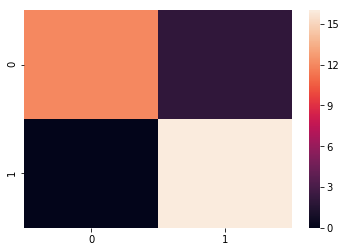

In [21]:
Y_predicted = [GD_predict(x, ridge_weights) for x in X_test.values]
cm = confusion_matrix(Y_test, Y_predicted)
print("Confusion Matrix",cm)
ax = sns.heatmap(confusion_matrix(Y_test, Y_predicted))

In [22]:
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
recall = (cm[1][1])/(cm[1][1] + cm[0][1])
precision = (cm[1][1])/(cm[1][1] + cm[0][0])
print(accuracy)

0.9333333333333333


**MICROCHIP DATASET**

In [23]:
mc_df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [24]:
x_features = [0,1]
y_features = [2]
x_exam = np.square(mc_df[x_features])
y_exam = mc_df[y_features]

In [25]:
x_exam.head()

,0,1
0,0.002628,0.489384
1,0.008601,0.469143
2,0.045672,0.479210
3,0.140625,0.252195
4,0.263426,0.216821


In [26]:
y_exam.head()

,2
0,1
1,1
2,1
3,1
4,1


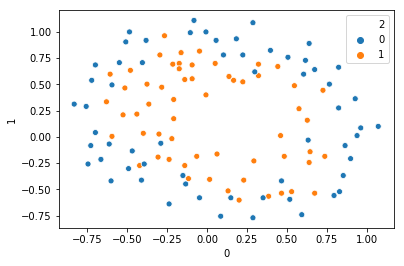

In [27]:
sns.scatterplot(x=0,y=1,hue=2,data=mc_df)

In [28]:
X_train, X_test, Y_train, Y_test = tts(x_exam, y_exam, test_size = 0.3, random_state = 5)

In [29]:
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_test = (X_test - np.mean(X_test))/np.std(X_test)

In [30]:
X_train = X_train.assign(b=1)
X_test = X_test.assign(b=1)

In [31]:
m = len(Y_train)
n = len(X_train.columns)
weights = np.zeros((n,1))
weights

array([[0.],
       [0.],
       [0.]])

In [32]:
alpha = 0.01
num_iters = 5000
lamda = 0.05

In [33]:
ridge_weights = ridgegradientDescentMulti(X_train, Y_train, weights, alpha, num_iters, lamda)

In [34]:
GD_predict(X_test.iloc[2], ridge_weights)

1

Confusion Matrix [[17  2]
 [ 7 10]]


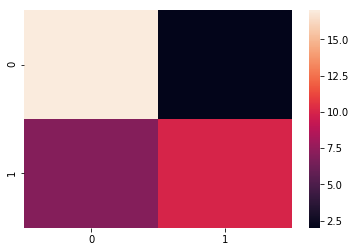

In [35]:
Y_predicted = [GD_predict(x, ridge_weights) for x in X_test.values]
cm = confusion_matrix(Y_test, Y_predicted)
print("Confusion Matrix",cm)
ax = sns.heatmap(confusion_matrix(Y_test, Y_predicted))

In [36]:
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
recall = (cm[1][1])/(cm[1][1] + cm[0][1])
precision = (cm[1][1])/(cm[1][1] + cm[0][0])
print(accuracy)

0.75
